In [2]:
# First we import all the needed modules

from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder # Appears to not be needed
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
# Load in dataset
# And split the dataset into train_x, test_x, train_y, test_y
boston = datasets.load_boston()
feature_set = boston.data
label_set = boston.target

train_x, test_x, train_y, test_y = train_test_split(feature_set, label_set, test_size = 0.2)

test_df = pd.DataFrame(feature_set)
# colummns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PT-RATIO", "B", "LSTAT", "MEDV"]



test_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PT-RATIO", "LSTAT", "MEDV"]

print(test_df.head())

print(test_df[["CRIM"]])

print(test_df.values)

# plt.scatter(feature_set.T[5], label_set)

plt.show()

# Got a little off-track again >,>

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [29]:
# Create a model

regression = linear_model.LinearRegression()
regression.fit(train_x, train_y)

prediction = regression.predict(test_x)
# print(f"The linear regression model is for {accuracy_score(test_y, prediction)}% accurate.")
# Appearantly the accuracy_score() function does not work for linear regression
# We need to find another metric

print(f"Predictions = {prediction}")
print(f"True values = {test_y}")
print(f"regression score = {regression.score(feature_set, label_set)}")
print(f"Test regression score ={regression.score(test_x,test_y)}")
print(f" coefficient = {regression.coef_}")
print(f" intercept = {regression.intercept_}")

Predictions = [30.40327667 19.34933543 13.25200434 16.97852776 19.23169167 16.87009058
 20.56783153 23.08132248  9.55570441 29.3741694  22.27020996  6.35228031
 17.38689072 23.48221618 21.9355281  28.42432538 24.09790808 14.59413116
 12.0920227  19.49642461 30.46986529 15.08996817 12.92866636 28.67167529
 12.50316038 15.71121843 19.02897265 12.52176595 33.45505976 23.25356968
 20.58297052 15.14805559 25.15168446 30.09544659 18.2056614  27.42778849
 30.55200855 30.3855139  24.33001824 20.56718311 17.8567293  16.83640461
 20.32224833 16.87148669 19.40827331 39.64690362 37.82523227 22.42901236
 23.5224485  32.42638424 34.42124657 19.95052408 18.59440655 23.07889041
 22.72673893 25.80608612 28.33526682 18.41538145 25.02263132 20.83939101
 21.51304666  8.61112095 19.85119275 43.52905791 25.02130273 13.74559958
  9.92132783 26.84231271  7.70956835 15.154512   19.16377014 22.3160848
 19.14518485 36.83198839 18.59241861 21.56846472 13.29013514 28.5295832
 27.36459208 32.46034775 40.49610351 23

-0.07471402075870992
0.03567666488029947
0.00984007863273317
2.563317662855671
-16.6497522783101
3.9889591670930615
-0.009144409654397851
-1.458732643088456
0.23536034597787536
-0.010152341883078234
-1.027588508018767
0.010790848484225297
-0.4748878962076948


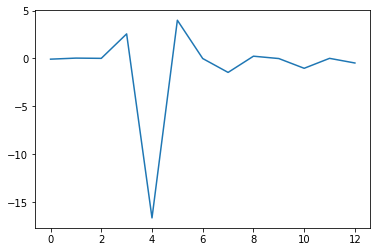

In [27]:
line_dict: dict = {}
for thing in range(len(regression.coef_)):
   # plt.scatter(thing, regression.coef_[thing])
   print(regression.coef_[thing])
   line_dict[thing] = regression.coef_[thing]

plt.plot(list(line_dict.keys()), list(line_dict.values()))
plt.show()
